<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/pothole_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import path to reflect new API location.
import cv2
import matplotlib.pyplot as plt

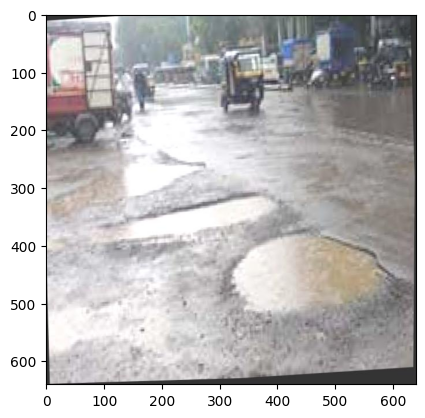

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using cv2.imread
img_array = cv2.imread("/content/drive/MyDrive/pothole/train/images/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg")

# Check if the image was loaded successfully
if img_array is not None:
    # Display the image using plt.imshow
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB if it was a normal image that `cv2.imread` was trying to read.
    plt.show()
else:
    print("Error: Could not load image.")

**CHECKING IMAGES FOR CONFIRMATION**

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using cv2.imread
img_array = cv2.imread("/kaggle/input/pothole-detection-dataset/normal/11.jpg")

# Check if the image was loaded successfully
if img_array is not None:
    # Display the image using plt.imshow
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB if needed
    plt.show()
else:
    print("Error: Could not load image. Please check the file path.")

Error: Could not load image. Please check the file path.


**Part 1 - Data Preprocessing**

****Splitting dataset into training and validation and preprocessing the training set****

In [ ]:
training_set='/content/drive/MyDrive/pothole/train/'

In [ ]:
validation_generator='/content/drive/MyDrive/pothole/valid/'

In [ ]:


# Splitting dataset into training and validation and preprocessing the training set
training_data_dir = '/content/drive/MyDrive/pothole/train/'  # Store the path in a new variable

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

# Now 'training_set' will hold the actual training data from flow_from_directory.
training_set = train_datagen.flow_from_directory(
    training_data_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
    subset="training"
)



Found 576 images belonging to 2 classes.


In [ ]:


# Create validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)  # You might want to apply the same preprocessing as training data

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/pothole/valid/',  # Path to your validation data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


# Training the CNN on the Training set and evaluating it on the Validation set
cnn.fit(x=training_set, validation_data=validation_generator, epochs=25)


Found 60 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 1.5286e-08 - val_accuracy: 1.0000 - val_loss: 1.8499e-22
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 493ms/step - accuracy: 1.0000 - loss: 2.4951e-09 - val_accuracy: 1.0000 - val_loss: 1.4357e-23
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step - accuracy: 1.0000 - loss: 3.5298e-09 - val_accuracy: 1.0000 - val_loss: 9.0129e-24
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 1.0000 - loss: 1.0148e-09 - val_accuracy: 1.0000 - val_loss: 8.3157e-24
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 515ms/step - accuracy: 1.0000 - loss: 2.7651e-09 - val_accuracy: 1.0000 - val_loss: 8.1982e-24
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 1.0000 - loss: 9.1921e-10 - val_accuracy: 1.0000 - val_loss: 8.1737e-24
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 1.0000 - loss: 9.0754e-10 - val_accuracy: 1.0000 - val_loss: 8.1665e-24
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 491ms/s

**Preprocessing the validation set**

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pothole/valid/', # Changed path to the correct directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 12 images belonging to 2 classes.


**Part 2 - Building the CNN**

**Initialising the CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

**Step 1 - Convolution**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 2 - Pooling**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Exception ignored in: <function _xla_gc_callback at 0x7e8fe3fcda80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


**Adding a second convolutional layer**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

**Step 4 - Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

**Compiling the CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Validation set**

In [ ]:
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 525ms/step - accuracy: 1.0000 - loss: 5.6815e-10 - val_accuracy: 1.0000 - val_loss: 7.9553e-24
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 467ms/step - accuracy: 1.0000 - loss: 5.0578e-09 - val_accuracy: 1.0000 - val_loss: 7.9378e-24
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 1.0000 - loss: 1.0933e-09 - val_accuracy: 1.0000 - val_loss: 7.9267e-24
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 482ms/step - accuracy: 1.0000 - loss: 2.2139e-09 - val_accuracy: 1.0000 - val_loss: 7.9118e-24
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step - accuracy: 1.0000 - loss: 1.2073e-09 - val_accuracy: 1.0000 - val_loss: 7.8973e-24
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 646ms/step - accuracy: 1.0000 - loss: 1.1135e-09 - val_accuracy: 1.0000 - val_loss: 7.8858e-24
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 419ms/step - accuracy: 1.0000 - loss: 1.5419e-09 - val_accuracy: 1.0000 - val_loss: 7.8716e-24
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms

**Part 4 - Making a single prediction**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/pothole/train/images/pic-10-_jpg.rf.1d433d21e11d000b6b498eacb88fe4a9.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
print(prediction)

pothole


In [ ]:
cnn.save('cnn.h5') # Change model to cnn

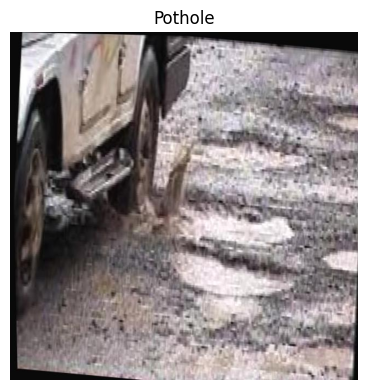

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Paths to image folders, updated to point to your data directory
pothole_path = '/content/drive/MyDrive/pothole/train/images' # Assuming your images are here


# Load one image from each class
pothole_img = mpimg.imread(os.path.join(pothole_path, os.listdir(pothole_path)[0]))


# Display the images side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(pothole_img)
plt.title("Pothole")
plt.axis('off')



plt.tight_layout()
plt.show()
